<a href="https://colab.research.google.com/github/reshmitha0424/PlottingInPython/blob/main/plotting_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will provide an example of creating a line plot in python using three modules: `matplotlib`, `pandas`, and `plotly`.

---

First, we need to import the necessary Python modules that will enable us to load and work with data, as well as create visualizations. We'll use the `pandas library` to read and manipulate data from a CSV file, `matplotlib` for creating static plots, and the `plotly.express` module for generating interactive and visually appealing charts.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### **Loading the data**

Now we can load the data to be visualized.  Let's use satellite-based sea level measurements from NOAA, and let's also use the minimum measurement for each time so we only have one line to plot.

In [3]:
# -- set the file name of the data
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_ref_90.csv"

# -- read the data from that file, skipping the first 5 rows of the file
data = pd.read_csv(fname, skiprows=5)

# -- take the minimum value of the measurements for each time
cols = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3", "Sentinel-6MF"]
minlev = data[cols].min(axis=1)

# -- add those values to the DataFrame
data["minlev"] = minlev

### **Plotting with `matplotlib`**

`matplotlib` is the most fundamental and ubiquitous plotting module in Python.  Let's make a basic line plot of our minimum sea level.

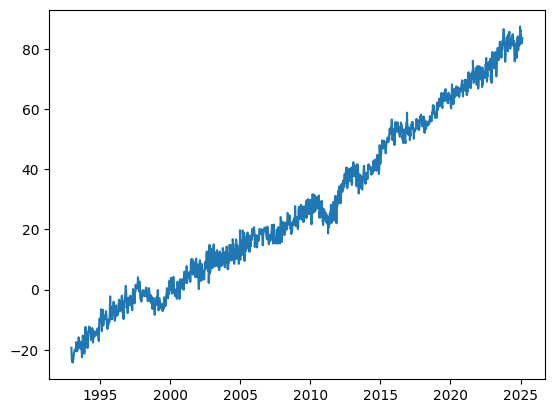

In [5]:
# -- create a figure object (a canvas) and an axis object (the plot on that canvas)
fig, ax = plt.subplots()

# -- plot the sea level column as a function of the time column
ax.plot(data["year"], data["minlev"])

# -- show the figure
fig.show()

***fig, ax = plt.subplots()***

- This line initializes a figure and an axes using matplotlib.
- Here fig acts as a whole canvas and ax is the area in that canvas where the plots can be drawn.
- plt.subplots() creates both the figure and axes in one line. This makes your plotting setup organized and modular. It is a convenient way to create both a figure and one or more subplots (axes) at the same time in matplotlib.
This function is preferred over using plt.figure() + plt.plot() because it returns both objects, giving you more control. It’s useful when you want to customize subplots, layouts, labels, legends, etc.

***ax.plot(data["year"], data["minlev"])***

- This line creates a line plot on the axis ax
- It takes values from the year column as the x-axis and minlev column as the y-axis.
- The function ax.plot() connects these points with straight lines, showing how sea level changes over time.

***fig.show()***

- This command displays the plot we just created.
- fig.show() is used here instead of plt.show() to explicitly call the show() method on the figure object that we created earlier.



This looks like a good start but we're missing a key thing i.e., axis labels; so that we know what the values actually mean.  Here is the same code as above, but with a line to set the axis labels appropriately (in this case, the year might be self-evident, but let's add it anyway).

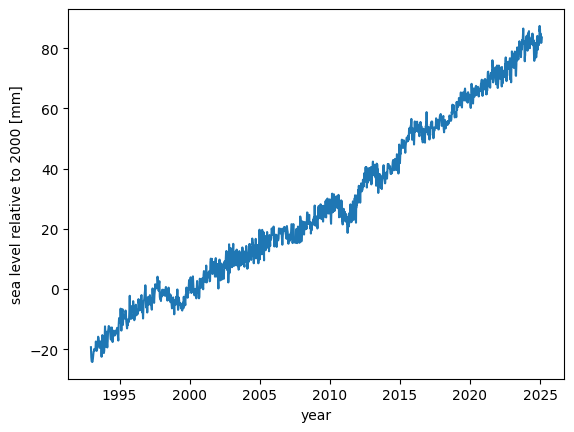

In [4]:
# -- create a figure object (a canvas) and an axis object (the plot on that canvas)
fig, ax = plt.subplots()

# -- plot the sea level column as a function of the time column
ax.plot(data["year"], data["minlev"])

# -- set the axis labels
ax.set_xlabel("year") #sets the label for the x-axis to “year” — which tells the viewer that the horizontal axis represents time.
ax.set_ylabel("sea level relative to 2000 [mm]") #sets the label for the y-axis to describe what is being measured.

# -- show the figure
fig.show()

This plot is fine as it stands since it conveys all the information in the data.  However, it is not particularly aesthetically pleasing and we could help the viewer compare values by adding gridlines.  Here's the above code with a few tweaks to change the figure size, add the gridlines, reduce the thickness of the line, and change it's color to red.

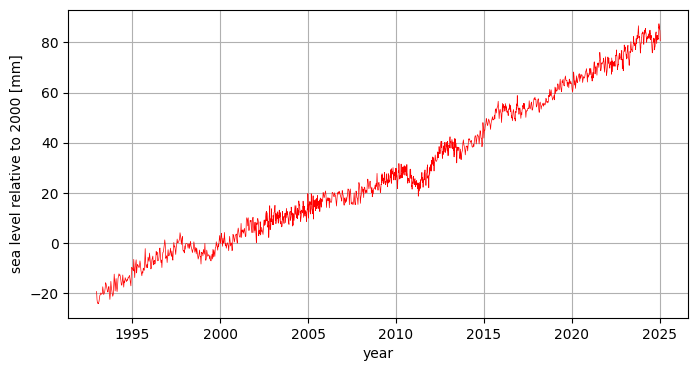

In [ ]:
# -- create a figure object (a canvas) and an axis object (the plot on that canvas)
fig, ax = plt.subplots(figsize=(8, 4))

# -- plot the sea level column as a function of the time column
ax.plot(data["year"], data["minlev"], lw=0.5, color="red")

# -- set the axis labels
ax.set_xlabel("year")
ax.set_ylabel("sea level relative to 2000 [mm]")

# -- add gridlines
ax.grid(True)

# -- show the figure
fig.show()

There are a *vast* number of ways that plots can be styled in `matplotlib` to tailor them to convey the information that you want the viewer to glean from the plot.  If you'd like, you can also change the detaul `matplotlib` "[stylesheet](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)" (note, in the code in the next cell for example, I'm not adding the gridlines, those are default in the stylesheet).

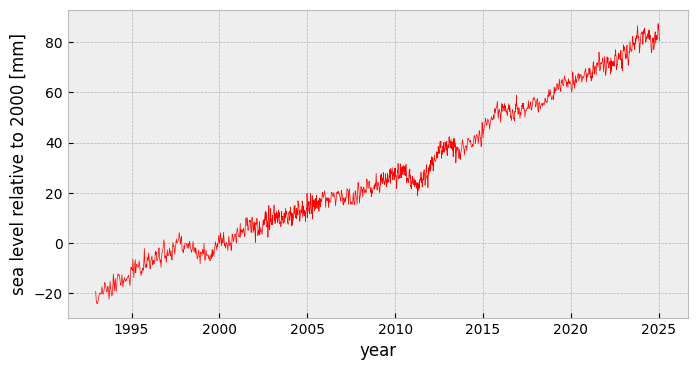

In [ ]:
# -- set the default MPL stylesheet
plt.style.use("bmh")

# -- create a figure object (a canvas) and an axis object (the plot on that canvas)
fig, ax = plt.subplots(figsize=(8, 4))

# -- plot the sea level column as a function of the time column
ax.plot(data["year"], data["minlev"], lw=0.5, color="red")

# -- set the axis labels
ax.set_xlabel("year")
ax.set_ylabel("sea level relative to 2000 [mm]")

# -- show the figure
fig.show()

`matplotlib` is the core plotting library upon which many others are built.  There is a nearly endless way of styling plots, creating unique plots, animating plots, and controlling aspects of `matplotlib` figures.  Take a look at the [gallery](https://matplotlib.org/stable/gallery/index.html) for some examples.

### **Plotting with `pandas`**

While `pandas` is primarily a module focused on data processing (with its heavy emphasis on DataFrames), it does also have its own wrappers around `matplotlib` functions that you can use to quickly make visualizations.  The core functionality is in the `.plot()` method of DataFrames, a function which returns a `matplotlib` axis object (note the `matplotlib` stylesheet is still active from the previous code cell, demonstrating that `pandas` is using `matplotlib` behind the scenes here).

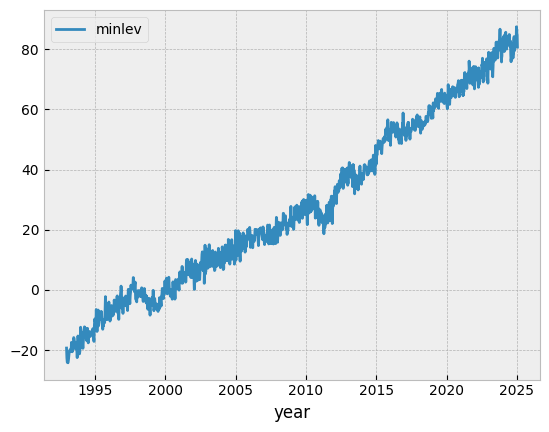

In [ ]:
# -- make a plot with pandas
ax = data.plot("year", "minlev")

`pandas` default plots are a bit odd.  They put the column name as the x-axis label on the bottom and rather than putting a y-axis label on the plot they add a legend by default with column name as the label.  Legends are essential when plotting multiple lines, but this is a bit overkill.  In addition, column names are almost never what you'd actually want to label your axes, and so you'll want to set them by hand.

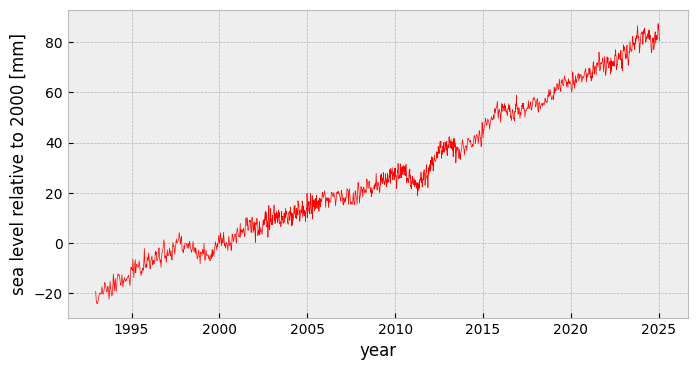

In [ ]:
# -- make a plot with pandas and setting the y-label, removing the legend, and styling the line
ax = data.plot("year", "minlev", ylabel="sea level relative to 2000 [mm]",
               lw=0.5, color="red", legend=False, figsize=(8, 4))

Since you have access to the `matplotlib` axis object, you can update the stylings afterwards if you like just like before.  Let's change the axis background color (called "facecolor" here) to black and set the grid lines to white.

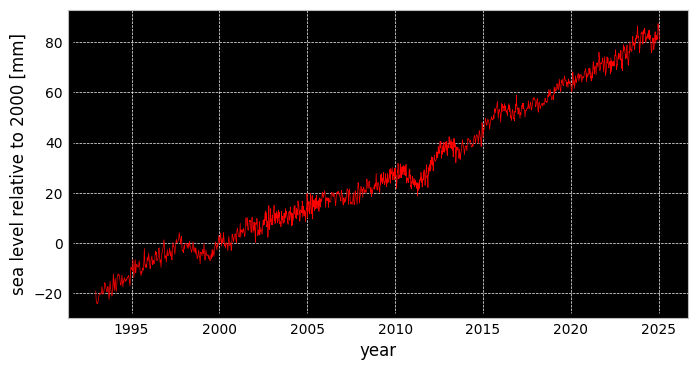

In [ ]:
# -- make a plot with pandas and setting the y-label, removing the legend, and styling the line
ax = data.plot("year", "minlev", ylabel="sea level relative to 2000 [mm]",
               lw=0.5, color="red", legend=False, figsize=(8, 4))

# -- set the face color of the axis
ax.set_facecolor("black")

# -- set the gridlines to white
ax.grid(True, color="white")

Lastly, you can get the `matplotlib` figure object that the axis is setting on with the `.get_figure()` method of `matplotlib` axis objects.  Let's get the figure object and then change the facecolor of the figure to be lightgray.

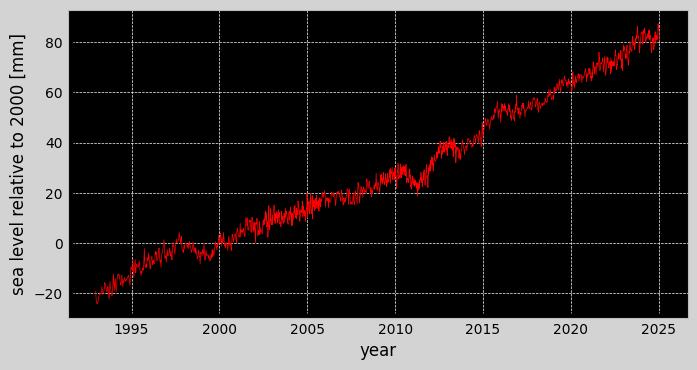

In [ ]:
# -- make a plot with pandas and setting the y-label, removing the legend, and styling the line
ax = data.plot("year", "minlev", ylabel="sea level relative to 2000 [mm]",
               lw=0.5, color="red", legend=False, figsize=(8, 4))

# -- set the face color of the axis
ax.set_facecolor("black")

# -- set the gridlines to white
ax.grid(True, color="white")

# -- get the figure
fig = ax.get_figure()

# -- set the figure face color
fig.set_facecolor("lightgray")

Because `pandas` plotting is just a convenience wrapper around `matplotlib`, you can style these visualizations any way you would with `matplotlib`.  `pandas` also has additional plotting routines for making figures more specific to certain data situations (e.g., time series plotting).  Have a look at the [documentation](https://pandas.pydata.org/docs/user_guide/visualization.html).

### **Plotting with `plotly`**

So far, all of our visualizations have been *static*.  They don't change and we can't interact with them.  That is very beneficial in a variety of cases, however, it is often useful to have the ability to interact with a plot, primarily for the purpose of data exploration.  There are many interactive plotting routines in Python, but let's stick with `plotly` for now, and in particular the `express` submodule of `plotly`.  Note that `plotly` is well integrated with `matplotlib` and `pandas` DataFrames, but the syntax is quite different.  Let's make a basic line plot as before.

In [ ]:
# -- make a line plot with plotly
fig = px.line(data, "year", "minlev")

# -- show the figure
fig.show()

If you move your cursor along the line in the plot, you'll see a popup window showing the exact values at the location of your cursor.  In the upper right, you'll also see a few tools that let you zoom in or select regions of the plot.  However, `plotly` also uses the column names as x- and y-labels.  You can change those by updating the "layout" of the figure.  But note(!), this `fig` object is a `plotly` figure object **not** a `matplotlib` figure object.  They are different and have different attributes and methods.

In [ ]:
# -- make a line plot with plotly
fig = px.line(data, "year", "minlev")

# -- change the y-axis label
fig.update_layout(yaxis_title="sea level relative to 2000 [mm]")

# -- show the figure
fig.show()

If you scroll over the plot, you'll see that, unfortunately, changing the y-axis label did not change the popup label, it still says "minlev".  We'll change that in a minute.  First, let's update the style a bit more by changing the width of the figure, setting the font color to black, and setting the background to be light gray, all in the same `.update_layout()` call.

In [ ]:
# -- make a line plot with plotly
fig = px.line(data, "year", "minlev")

# -- change the y-axis label, set the background color, and set the width
fig.update_layout(yaxis_title="sea level relative to 2000 [mm]",
                  font_color="black", plot_bgcolor="lightgray", width=900)

# -- show the figure
fig.show()

The line itself is not part of the plot's "layout", it is its own separate entity on the plot and is referred to as a "trace" in `plotly`.  You can update this as well.

In [ ]:
# -- make a line plot with plotly
fig = px.line(data, "year", "minlev")

# -- change the y-axis label, set the background color, and set the width
fig.update_layout(yaxis_title="sea level relative to 2000 [mm]",
                  font_color="black", plot_bgcolor="lightgray", width=900)

# -- change the line color to red and set the line width
fig.update_traces(line_color="red", line_width=1)

# -- show the figure
fig.show()

Lastly, let's fix that pop-up box labeling.  Rather than setting axis labels by hand as we did above, it is most common in `plotly` to define a dictionary of labels that match up the labels you have (i.e., the column names) with the labels you want and passing that to the plotting function.  Note that, in the cell below, I am no longer setting the y-axis label in `.update_layout()`, `plotly` is taking care of that with its relabeling using my dictionary of replacement labels.

In [ ]:
# -- define re-labeling for the plot
labs = {"minlev":"sea level relative to 2000 [mm]", "year":"calendar year"}

# -- make a line plot with plotly including relabeling
fig = px.line(data, "year", "minlev", labels=labs)

# -- set the background color and set the width
fig.update_layout(font_color="black", plot_bgcolor="lightgray", width=900)

# -- change the line color to red and set the line width
fig.update_traces(line_color="red", line_width=1)

# -- show the figure
fig.show()

You'll also notice that the relabeling process relabeled the pop-up window as well so that the pop-up label matches the new y-axis label.  As with `matplotlib`, `plotly` styling and the various kinds of plots you can make are extremely flexible with many examples given in their [gallery](https://plotly.com/python/).